In [1]:
# Import used libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import csv
# link to dataset: 
# https://www.kaggle.com/datasets/jakewright/9000-tickers-of-stock-market-data-full-history
stock = pd.read_csv('all_stock_data.csv')
stock.head()

,Date,Ticker,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1962-01-02,ED,0.0,0.265828,0.261788,0.261788,25600.0,0.0,0.0
1,1962-01-02,CVX,0.0,0.046809,0.046069,0.046809,105840.0,0.0,0.0
2,1962-01-02,GD,0.0,0.210033,0.203061,0.208290,2648000.0,0.0,0.0
3,1962-01-02,BP,0.0,0.141439,0.139528,0.139528,77440.0,0.0,0.0
4,1962-01-02,MSI,0.0,0.764923,0.745254,0.751810,65671.0,0.0,0.0


In [3]:
# Check data types of columns
print(stock.dtypes)

Date             object
Ticker           object
Open            float64
High            float64
Low             float64
Close           float64
Volume          float64
Dividends       float64
Stock Splits    float64
dtype: object


In [4]:
# Change date column to datetime datatype
stock['Date'] = pd.to_datetime(stock['Date'])
print(stock.dtypes)

Date            datetime64[ns]
Ticker                  object
Open                   float64
High                   float64
Low                    float64
Close                  float64
Volume                 float64
Dividends              float64
Stock Splits           float64
dtype: object


In [5]:
# Only use the past 5 years as data
stock = stock[stock['Date'] >= '2019-11-03'].reset_index(drop=True)
print(stock.head())

        Date Ticker        Open        High         Low       Close    Volume  \
0 2019-11-04    ATR  108.093163  108.823457  105.561481  105.814644  553700.0   
1 2019-11-04   BTCS    0.110000    0.135000    0.105000    0.106000  185800.0   
2 2019-11-04   LFCR   10.080000   10.300000   10.020000   10.290000   96500.0   
3 2019-11-04  ZIONO   24.183792   24.183792   24.008357   24.052216    8200.0   
4 2019-11-04   GBCI   41.255678   41.255678   40.670623   41.114132  238600.0   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [6]:
# Filter columns for relevant columns
stock = stock[['Date', 'Open', 'Close', 'Volume']]
print(stock.head())

        Date        Open       Close    Volume
0 2019-11-04  108.093163  105.814644  553700.0
1 2019-11-04    0.110000    0.106000  185800.0
2 2019-11-04   10.080000   10.290000   96500.0
3 2019-11-04   24.183792   24.052216    8200.0
4 2019-11-04   41.255678   41.114132  238600.0


In [7]:
# Check for null columns
print(stock.isnull().sum())

Date       0
Open      13
Close     10
Volume     0
dtype: int64


In [8]:
# Drop null columns and it doesn't seem to be a widespread issue
stock = stock.dropna()
print(stock.isnull().sum())

Date      0
Open      0
Close     0
Volume    0
dtype: int64


In [9]:
# Calculate price change as percentage
stock['Change'] = ((stock['Close'] - stock['Open']) 
                         / stock['Open'] * 100).round(2)
print(stock.head())

        Date        Open       Close    Volume  Change
0 2019-11-04  108.093163  105.814644  553700.0   -2.11
1 2019-11-04    0.110000    0.106000  185800.0   -3.64
2 2019-11-04   10.080000   10.290000   96500.0    2.08
3 2019-11-04   24.183792   24.052216    8200.0   -0.54
4 2019-11-04   41.255678   41.114132  238600.0   -0.34


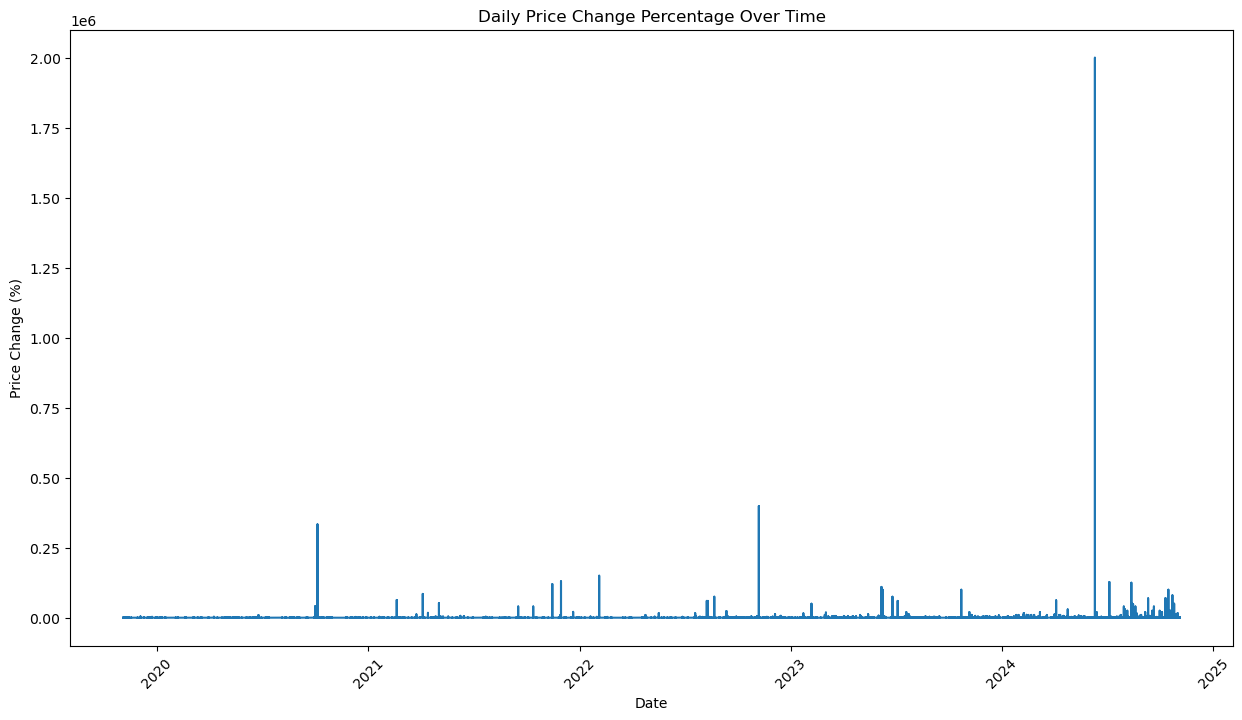

In [10]:
plt.figure(figsize=(15, 8))
plt.plot(stock['Date'], stock['Change'])
plt.title('Daily Price Change Percentage Over Time')
plt.xlabel('Date')
plt.ylabel('Price Change (%)')
plt.xticks(rotation=45)
plt.show()

In [11]:
# Group by week and calculate mean
stock.set_index('Date', inplace=True)
stock = stock.resample('W').mean()
stock.reset_index(inplace=True)
# Round Volumn to nearest number
stock['Volume'] = stock['Volume'].round(0).astype(int)
print(stock.head())

        Date         Open        Close  Volume    Change
0 2019-11-10  2969.520472  2999.742644  967803  0.256248
1 2019-11-17  2731.232389  2727.037939  895803  0.289054
2 2019-11-24  2603.829133  2602.605173  883489  0.139170
3 2019-12-01  2889.558251  2764.358493  784014  0.494625
4 2019-12-08  2485.534418  2440.562975  901310  0.386788


In [12]:
# Export dataframe as new dataset
stock.to_csv('stock_data.csv', index=True)

In [14]:
# Verify the export
test_read = pd.read_csv('stock_data.csv')
print(test_read.head())

   Unnamed: 0        Date         Open        Close  Volume    Change
0           0  2019-11-10  2969.520472  2999.742644  967803  0.256248
1           1  2019-11-17  2731.232389  2727.037939  895803  0.289054
2           2  2019-11-24  2603.829133  2602.605173  883489  0.139170
3           3  2019-12-01  2889.558251  2764.358493  784014  0.494625
4           4  2019-12-08  2485.534418  2440.562975  901310  0.386788
